# ***Food_Delivery_Times***


# ***Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# ***EDA***

In [ ]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')

In [ ]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [ ]:
for col in cat_cols:
  print(col,df[col].unique())

Weather ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
Traffic_Level ['Low' 'Medium' 'High' nan]
Time_of_Day ['Afternoon' 'Evening' 'Night' 'Morning' nan]
Vehicle_Type ['Scooter' 'Bike' 'Car']


# **Cleaning Data**

In [ ]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)


<ipython-input-31-510b767b98ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
<ipython-input-31-510b767b98ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [ ]:
df.drop('Order_ID', axis=1, inplace=True)

# ***Visualization***

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

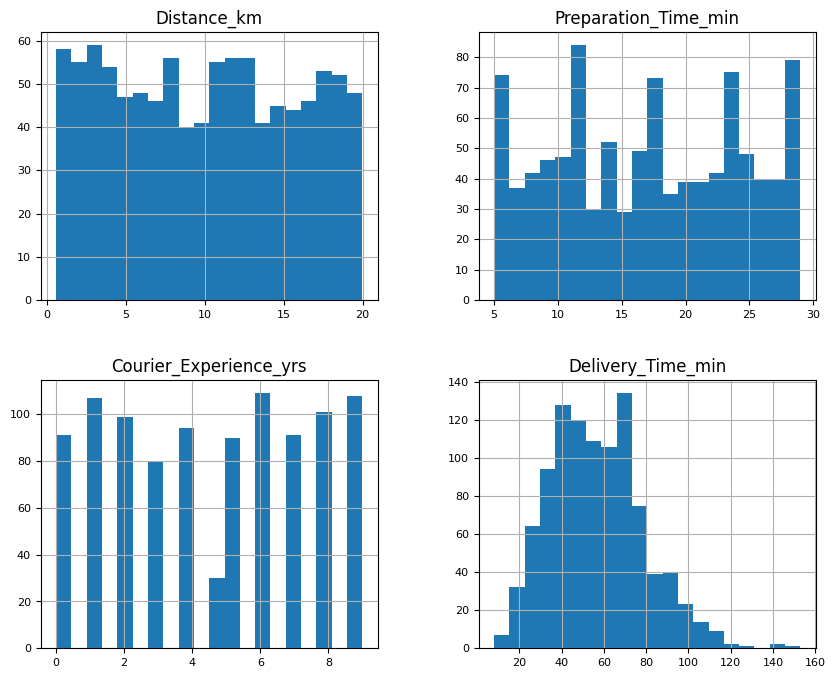

In [ ]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

<ipython-input-36-648bbd7e3efa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df , palette='Set1')


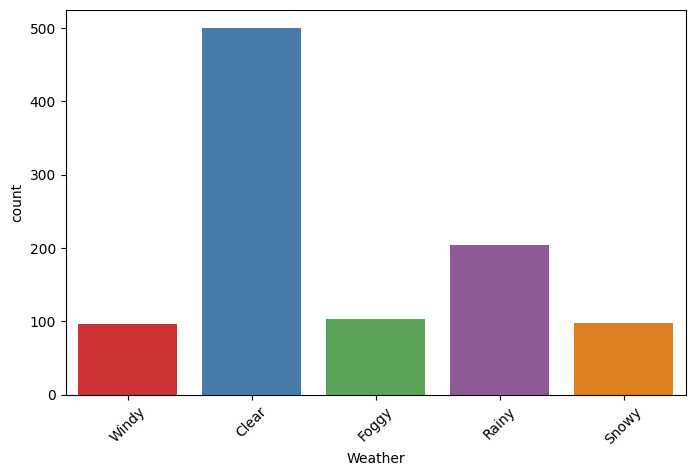

<ipython-input-36-648bbd7e3efa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df , palette='Set1')


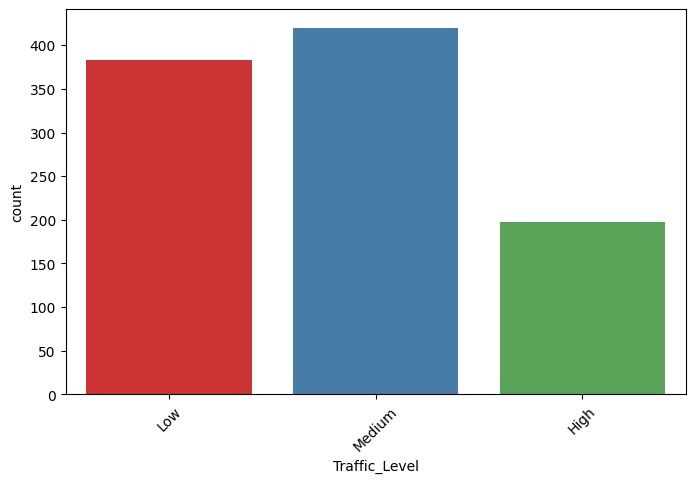

<ipython-input-36-648bbd7e3efa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df , palette='Set1')


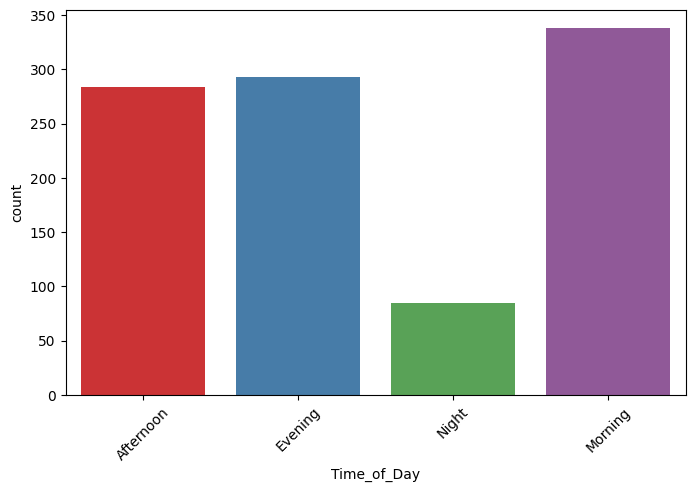

<ipython-input-36-648bbd7e3efa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df , palette='Set1')


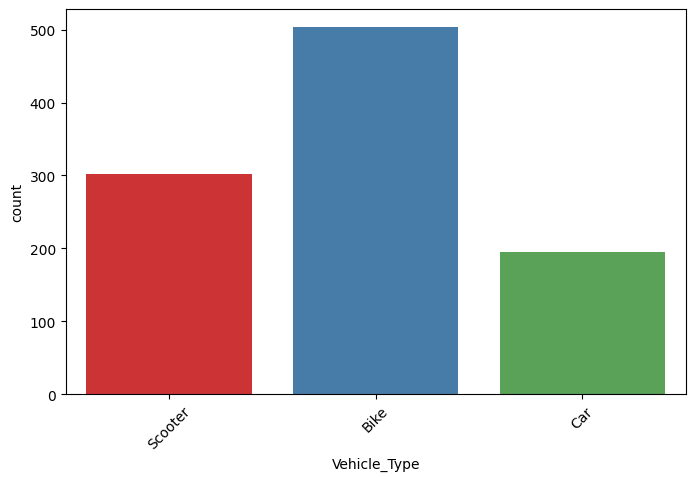

In [ ]:
for col in cat_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=col, data=df , palette='Set1')
  plt.xticks(rotation=45)
  plt.show()

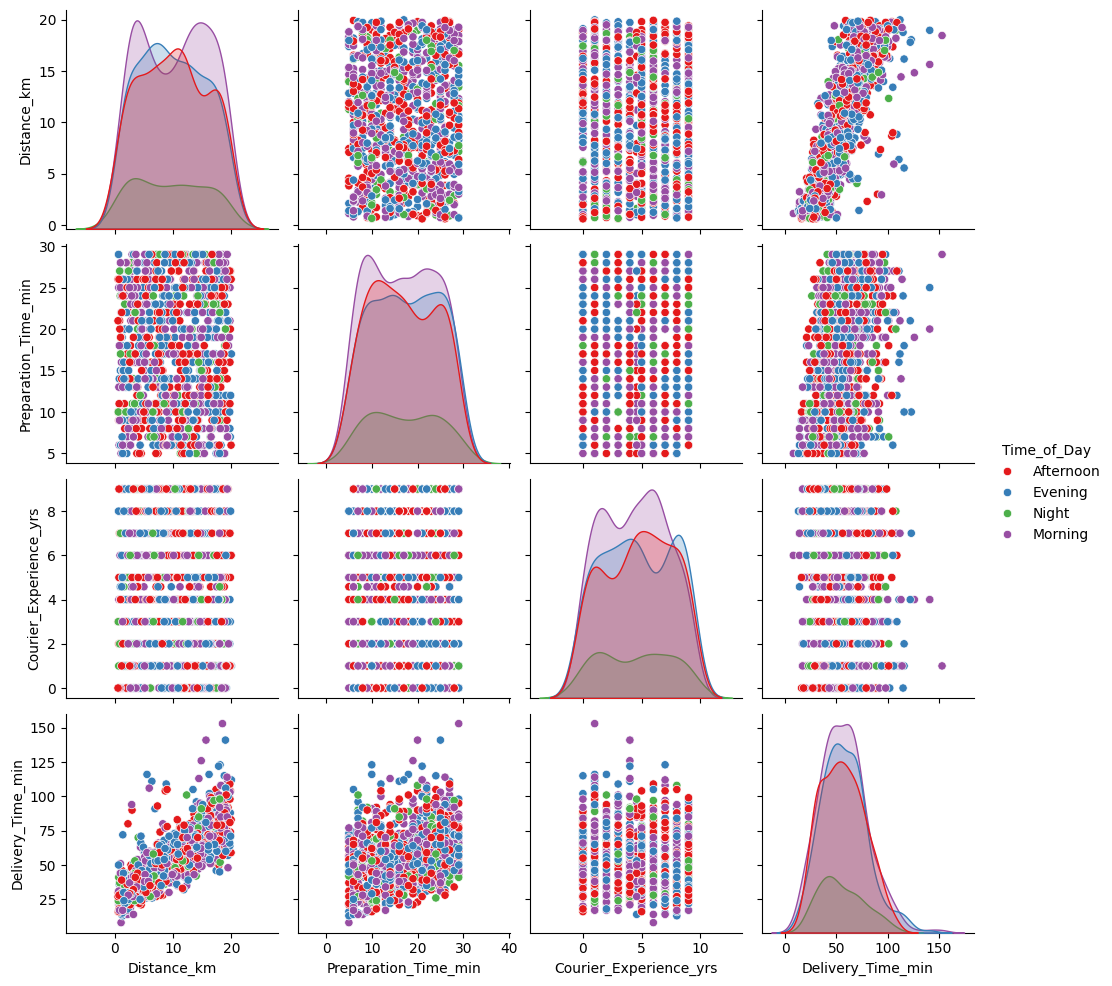

In [ ]:
sns.pairplot(df, hue='Time_of_Day', palette='Set1', vars=num_cols)
plt.show()

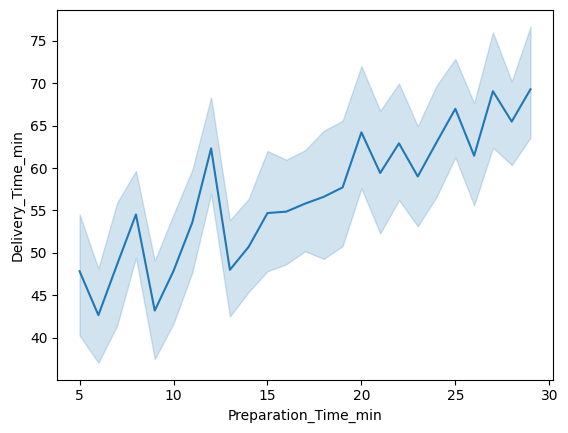

In [ ]:
sns.lineplot(x='Preparation_Time_min', y='Delivery_Time_min', data=df)
plt.show()

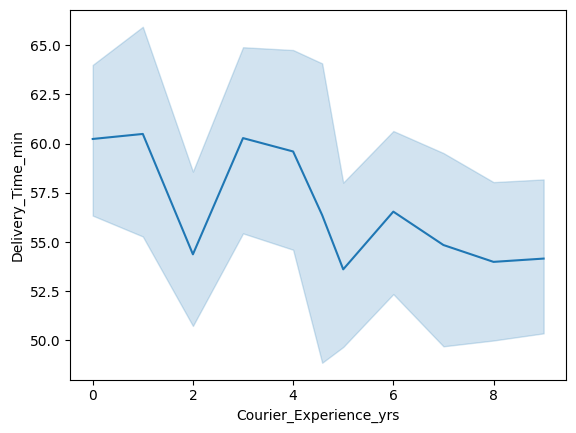

In [ ]:
sns.lineplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.show()

# ***Handling Outliers***

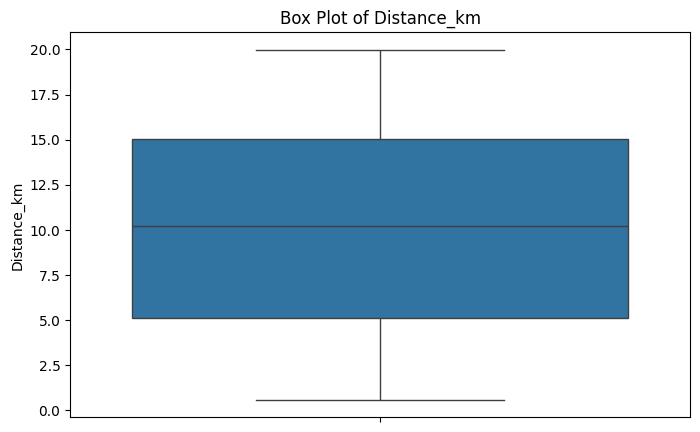

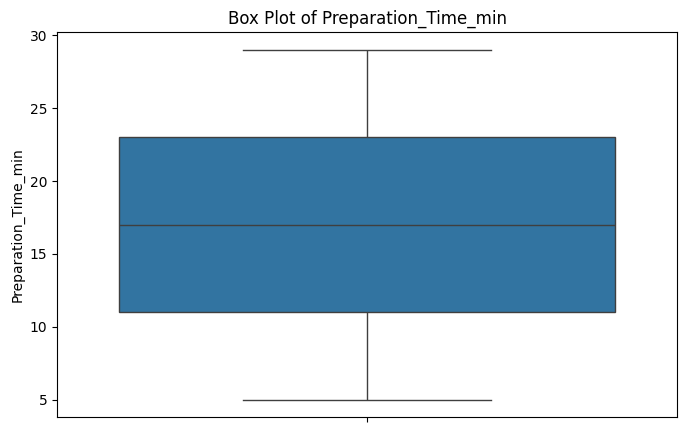

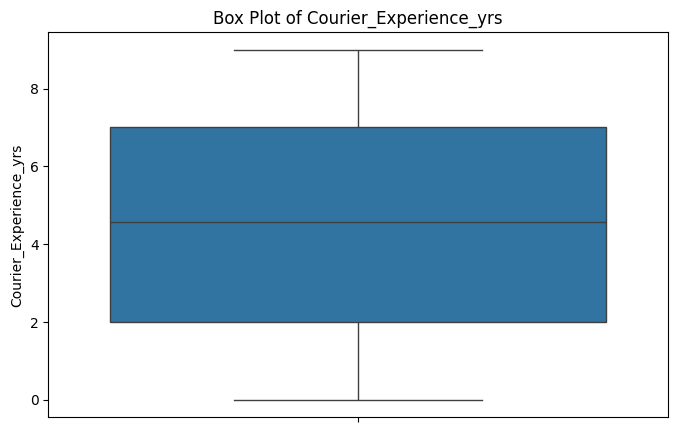

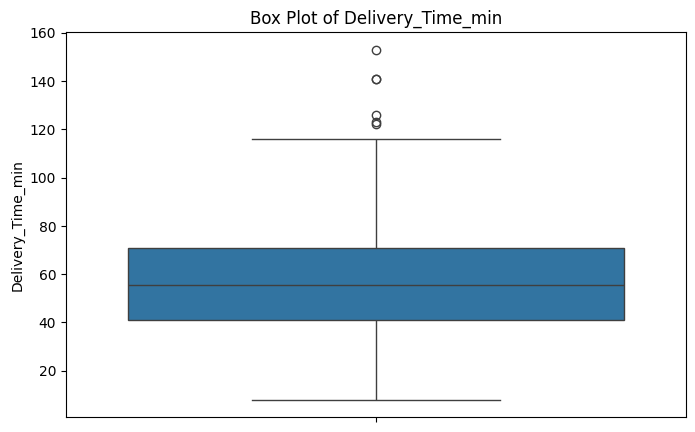

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower = lower_bound, upper = upper_bound)


In [ ]:
handle_outliers(df,'Delivery_Time_min')

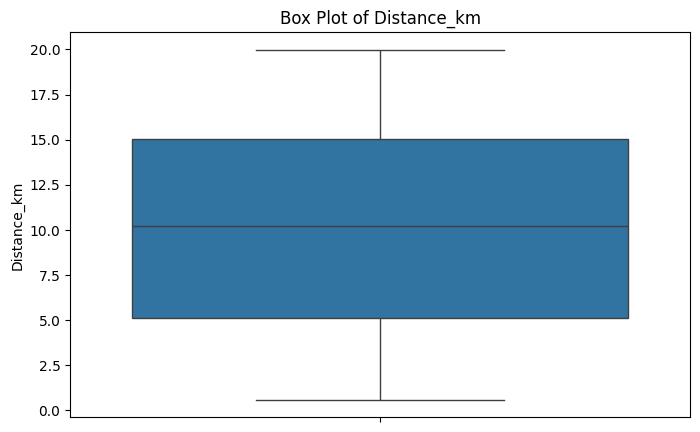

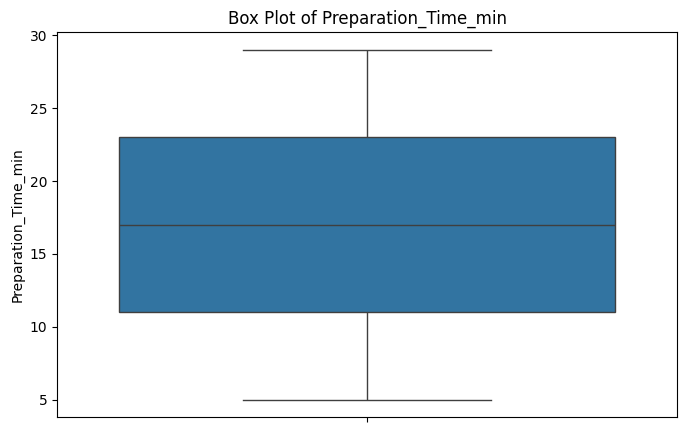

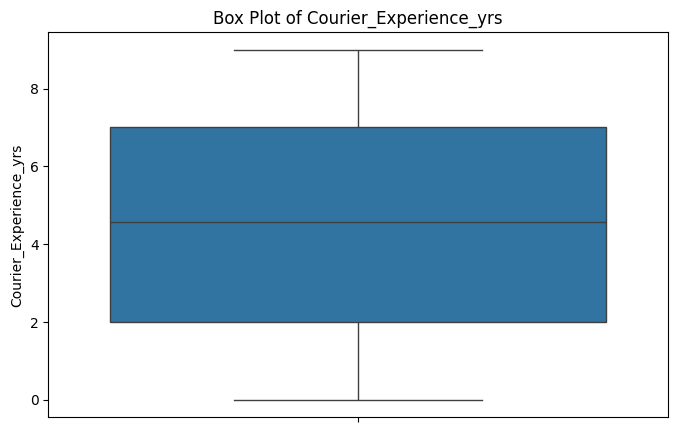

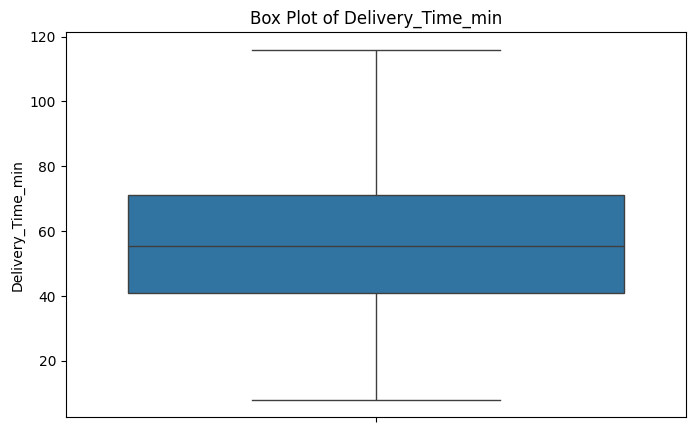

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [ ]:
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


# ***ML***

In [ ]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
hot_cols = ['Weather' , 'Vehicle_Type' , 'Time_of_Day']

In [ ]:
df = pd.get_dummies(df, columns=hot_cols, dtype=int)

In [ ]:
le = LabelEncoder()
df['Traffic_Level'] = le.fit_transform(df['Traffic_Level'])

In [ ]:
df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,7.93,1,12,1.0,43,0,0,0,0,1,0,0,1,1,0,0,0
1,16.42,2,20,2.0,84,1,0,0,0,0,1,0,0,0,1,0,0
2,9.52,1,28,1.0,59,0,1,0,0,0,0,0,1,0,0,0,1
3,7.44,2,5,1.0,37,0,0,1,0,0,0,0,1,1,0,0,0
4,19.03,1,16,5.0,68,1,0,0,0,0,1,0,0,0,0,1,0


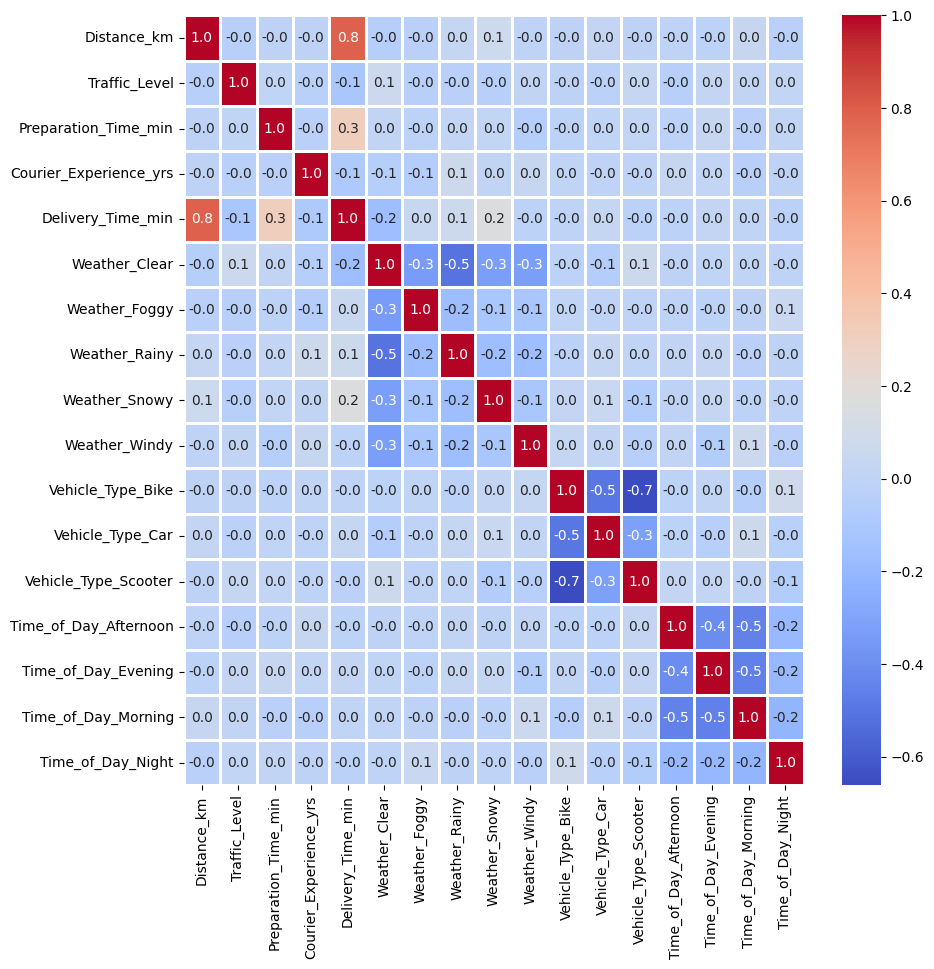

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True , cmap='coolwarm' , linewidths=1, fmt='.1f')
plt.show()

In [ ]:
threshold = 0.07

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Delivery_Time_min"]) > threshold].tolist()
high_corr_features.remove("Delivery_Time_min")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["Delivery_Time_min"]

['Distance_km', 'Traffic_Level', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Clear', 'Weather_Rainy', 'Weather_Snowy']


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.2 , random_state=42)

In [ ]:
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(X_train , y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
model3 = RandomForestRegressor(n_estimators=50 )
model3.fit(X_train , y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
model4 = SVR()
model4.fit(X_train , y_train)

SVR()

In [ ]:
y_pred4 = model4.predict(X_test)

In [ ]:
model5 = KNeighborsRegressor()
model5.fit(X_train , y_train)

KNeighborsRegressor()

In [ ]:
y_pred5 = model5.predict(X_test)

In [ ]:
model6 = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    min_child_weight=1
)
model6.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred6 = model6.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred):
    model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

for model, y_pred in zip([model1, model2, model3, model4, model5,model6], [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5,y_pred6]):
    mae, mse, r2 = evaluate_model(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"model score: {model.score(X_train, y_train)}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")

Model: LinearRegression
model score: 0.7434928634811695
MAE: 6.950722161400822
MSE: 100.48684006656906
R2 Score: 0.7738884979925047
Model: DecisionTreeRegressor
model score: 1.0
MAE: 10.28
MSE: 220.18
R2 Score: 0.5045596967818937
Model: RandomForestRegressor
model score: 0.9592591792343612
MAE: 7.1076999999999995
MSE: 100.802146
R2 Score: 0.7731790090867663
Model: SVR
model score: 0.7008574458345931
MAE: 7.756853958325143
MSE: 120.86861679974548
R2 Score: 0.7280262323697929
Model: KNeighborsRegressor
model score: 0.8003554831681028
MAE: 8.417
MSE: 131.7038
R2 Score: 0.7036453328777508
Model: XGBRegressor
model score: 0.8460460484176844
MAE: 6.27250684261322
MSE: 81.4430680104743
R2 Score: 0.8167400385588053


In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred_lasso = model_lasso.predict(X_test)

In [ ]:
print(f"Model score: {model_lasso.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")

Model score: 0.7276038579154522
MAE: 7.395960715169179
MSE: 111.78940717271519
R2 Score: 0.7484559097728116


In [ ]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = model_ridge.predict(X_test)

In [ ]:
print(f"Model score: {model_ridge.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")

Model score: 0.7434917625793456
MAE: 6.950132737032418
MSE: 100.46386283621871
R2 Score: 0.7739402004449158


# 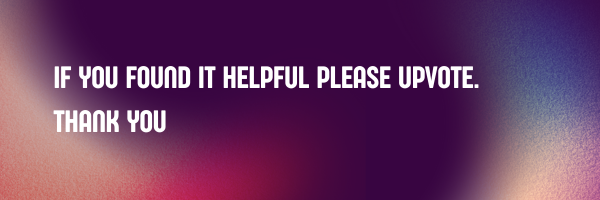